In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('behavior-performance.txt', sep='\t')

In [4]:
data.head(5)

,userID,VidID,fracSpent,fracComp,fracPlayed,fracPaused,numPauses,avgPBR,stdPBR,numRWs,numFFs,s
0,718eaa5dec19bcf6c7fea0870dd102dbe844fbbb,0,1.145098,0.995568,0.995568,0.000000,0,1.500000,0.000000e+00,0,0,0
1,210f854b0afc3d476d711b2b41379954e48cfa44,0,0.573497,0.858001,0.858001,1.998006,6,1.500000,2.220446e-16,0,4,0
2,e16cf25ff5bb827bf3b5a0c8afeed15c2223a8b5,0,0.778732,0.829160,1.137497,0.051103,1,1.462199,8.956206e-02,2,0,1
3,46dff32368088c11707106514f0450518d19b30d,0,0.639626,0.857684,0.860312,0.000000,0,1.345555,2.111871e-01,1,7,0
4,8a861f5af4ed0668eb03bd8a77d2b7ced04f901e,0,0.786526,0.754330,1.051675,0.000000,0,1.339290,2.451593e-01,6,0,1


In [5]:
#to make a list of user IDs with 5 or more than 5 videos watched
l=(data['userID'].value_counts()>=5).index
p=pd.DataFrame(data['userID'].value_counts()>=5)
p.reset_index(inplace=True)
l=list(p[p['userID']==True]['index'].values)
l

['4d5d7029098d27de683289d66bfafecda8c44fa9',
 '4545dbd04bd651793b14c3f2dfdd2d7d38669404',
 '25770362fce3cff8c79a587ef7e17fe42cf98125',
 'b1d60f253cbf1eb172aa1bd507d864b61f4e6128',
 '3a06c1d4cadf969114ac27d0e8743c32984ca9ff',
 'd72b9e74dfed09f0fa5b3d93e98e075f543c6150',
 '8faf9e10cad7c52163af318cfdd27f2cb31f5937',
 'd6bc435c7366d8ee93970d9f64cee0e5d97bc5f0',
 'b06295d1da6023f5bec5db33232cc204a1158ce7',
 '8cd96e21c865ccca57686e88c21e0fa4242d9c2e',
 'ccc57b2d84559beeac5f7d9b772e539456ef39b6',
 '24bb4b554a02e492b0326a582cae445b598d8465',
 'b0b479337d67d8f2a7886eb93c501b171f214fec',
 '3a665a732aa02fa149b80c67070a7323e0a4711e',
 '197aec6ca3bed06f9210482d2dd6c8031ba2801d',
 '564a97d695ec841cc64bcff9bc80761319180830',
 '4d9c215dd4e6801c8f7934eab4bd51975dc166ed',
 '04108c46a2e0ed82575cff094bc3444d19ae16d2',
 '1dbb6090c06047ebdbd65c1d728d9fbf9073b435',
 '0c301f0ed31215269001399cfa4fcc34d7b6d38a',
 'c7addec277b31656c6bff5beb358c276726f4034',
 '63530562ded4284328459561e55b639023638f64',
 '705747de

In [6]:
#making new dataframe with userIDs from list l
m=pd.DataFrame(columns=list(data.columns))
for i in list(data['userID'].value_counts().index):
    if i in l:
        m=pd.concat([m, data[data['userID']==i]], axis=0)
m.head(5)

,userID,VidID,fracSpent,fracComp,fracPlayed,fracPaused,numPauses,avgPBR,stdPBR,numRWs,numFFs,s
1983,4d5d7029098d27de683289d66bfafecda8c44fa9,0,1.026568,0.315498,1.026053,0.171945,2,1.0,0.0,2,0,0
4046,4d5d7029098d27de683289d66bfafecda8c44fa9,1,0.704640,0.704640,0.704640,0.000000,0,1.0,0.0,0,1,1
5646,4d5d7029098d27de683289d66bfafecda8c44fa9,2,0.213791,0.208559,0.208559,0.000000,0,1.0,0.0,0,9,1
6998,4d5d7029098d27de683289d66bfafecda8c44fa9,3,0.120855,0.120846,0.120846,0.000000,0,1.0,0.0,0,13,1
8165,4d5d7029098d27de683289d66bfafecda8c44fa9,4,0.518459,0.518449,0.518449,0.027784,1,1.0,0.0,0,16,0


## Task 1: Clustering students

In [7]:
X=m[['VidID','fracSpent', 'fracComp', 'fracPlayed', 'fracPaused',
       'numPauses', 'avgPBR', 'stdPBR', 'numRWs', 'numFFs', 's']]

In [8]:
model= KMeans(n_clusters=6, max_iter=150, random_state=42)

In [9]:
# Fit the k-means object to the data
model.fit(X)

# Get the labels assigned to each data point
labels = model.labels_

# Get the coordinates of the cluster centers
centroids = model.cluster_centers_


/Users/shounakmukherjee/Library/Python/3.10/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
centroids

array([[2.20000411e+01, 1.17262067e+01, 7.66216320e-01, 9.71164819e-01,
        1.17149097e+01, 2.85230402e+00, 1.11257268e+00, 1.43866066e-02,
        2.19324208e+00, 1.53853743e+00, 6.68352037e-01],
       [1.05384615e+01, 1.67678357e+01, 6.09624281e-01, 1.00088575e+00,
        1.15858332e+04, 4.07692308e+00, 1.03984449e+00, 3.41354985e-02,
        2.61538462e+00, 4.07692308e+00, 7.69230769e-01],
       [1.30909091e+01, 1.14937300e+04, 3.68929056e-01, 3.77250904e-01,
        7.56663520e+00, 1.00000000e+00, 8.18182008e-01, 2.07872225e-04,
        1.81818182e-01, 4.54545455e-01, 4.54545455e-01],
       [1.44333333e+01, 3.63377372e+01, 5.95404787e-01, 8.31250088e-01,
        6.50239662e+03, 4.10000000e+00, 1.01958677e+00, 1.25187444e-02,
        3.33333333e+00, 3.33333333e+00, 7.00000000e-01],
       [1.79724138e+01, 1.51098742e+01, 7.01871949e-01, 1.25584784e+00,
        1.79789146e+03, 5.11034483e+00, 1.19449901e+00, 2.93801680e-02,
        3.28965517e+00, 1.90344828e+00, 6.96551724e-

In [11]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [12]:
# Calculate the Silhouette score for the clustering model
silhouette_score(X, model.labels_)

0.9570937684410242

In [13]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/Users/shounakmukherjee/Library/Python/3.10/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shounakmukherjee/Library/Python/3.10/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shounakmukherjee/Library/Python/3.10/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shounakmukherjee/Library/Python/3.10/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

In [14]:
wcss

[6369496838.540368,
 3609168100.3427954,
 1872206099.1811044,
 1403962548.3921776,
 1047704543.4582001,
 823317226.0962728,
 621993267.8654062,
 516698790.4191462,
 415083735.17373836,
 343605752.09203684]

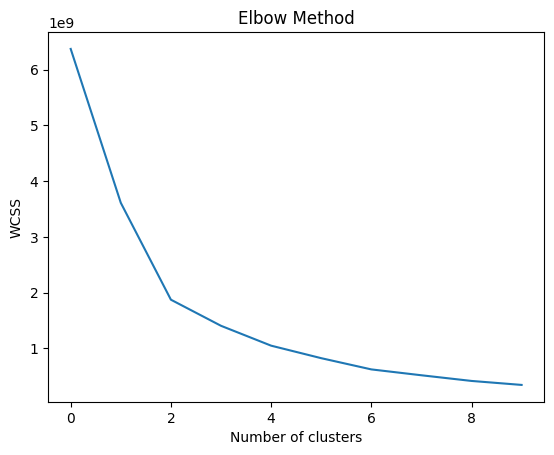

In [15]:
# Plot the WCSS values against the number of clusters
plt.plot(wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Task 2: r2 score and mse

In [16]:
#counting s(i.e. s=1) for every userID
cnt=m.groupby('userID')['s'].sum()
cnt
m['s'].sum()
m[m['userID']=='3a06c1d4cadf969114ac27d0e8743c32984ca9ff'] #displaying records from m with provided userID

,userID,VidID,fracSpent,fracComp,fracPlayed,fracPaused,numPauses,avgPBR,stdPBR,numRWs,numFFs,s
157,3a06c1d4cadf969114ac27d0e8743c32984ca9ff,0,0.512064,0.485171,0.508998,24.561849,3,1.000000,0.000000,0,7,1
2710,3a06c1d4cadf969114ac27d0e8743c32984ca9ff,1,90.311888,0.035858,0.035858,4734.521080,2,1.000000,0.000000,0,0,1
4595,3a06c1d4cadf969114ac27d0e8743c32984ca9ff,2,0.496759,0.470267,0.490331,1.407742,3,1.000000,0.000000,1,1,1
6116,3a06c1d4cadf969114ac27d0e8743c32984ca9ff,3,0.403482,0.307956,0.387956,0.000000,0,1.000000,0.000000,0,6,0
7393,3a06c1d4cadf969114ac27d0e8743c32984ca9ff,4,0.017796,0.010706,0.010706,3004.619932,2,1.000000,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29034,3a06c1d4cadf969114ac27d0e8743c32984ca9ff,88,0.686452,0.990015,0.990015,0.000000,0,1.450145,0.147720,0,0,0
29093,3a06c1d4cadf969114ac27d0e8743c32984ca9ff,89,0.667692,0.912578,1.008936,0.000000,0,1.513944,0.119502,3,3,0
29155,3a06c1d4cadf969114ac27d0e8743c32984ca9ff,90,0.616638,0.805723,0.819868,0.005042,2,1.433155,0.156648,1,3,1
29205,3a06c1d4cadf969114ac27d0e8743c32984ca9ff,91,0.739010,0.997069,0.997069,0.000000,0,1.356116,0.135514,0,0,1


In [17]:
# group rows by user ID and calculate sum of scores for each group
sum_scores = m.groupby("userID")["s"].sum()
avg_fracSpent = m.groupby("userID")["fracSpent"].mean()
avg_fracPause=m.groupby("userID")["fracPaused"].mean()

# create new column with sum of scores for each user ID
m["sum_score"] = m["userID"].map(sum_scores)
m["avg_fracSpent"] = m["userID"].map(avg_fracSpent)
m["avg_fracPause"] = m["userID"].map(avg_fracPause)

# print updated DataFrame
m

,userID,VidID,fracSpent,fracComp,fracPlayed,fracPaused,numPauses,avgPBR,stdPBR,numRWs,numFFs,s,sum_score,avg_fracSpent,avg_fracPause
1983,4d5d7029098d27de683289d66bfafecda8c44fa9,0,1.026568,0.315498,1.026053,0.171945,2,1.0,0.0,2,0,0,36,0.128915,0.031342
4046,4d5d7029098d27de683289d66bfafecda8c44fa9,1,0.704640,0.704640,0.704640,0.000000,0,1.0,0.0,0,1,1,36,0.128915,0.031342
5646,4d5d7029098d27de683289d66bfafecda8c44fa9,2,0.213791,0.208559,0.208559,0.000000,0,1.0,0.0,0,9,1,36,0.128915,0.031342
6998,4d5d7029098d27de683289d66bfafecda8c44fa9,3,0.120855,0.120846,0.120846,0.000000,0,1.0,0.0,0,13,1,36,0.128915,0.031342
8165,4d5d7029098d27de683289d66bfafecda8c44fa9,4,0.518459,0.518449,0.518449,0.027784,1,1.0,0.0,0,16,0,36,0.128915,0.031342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9689,a4c6bc8aafd0f4022a71cdbf86634592e6eb85b6,6,1.189938,0.790405,1.191452,0.218660,15,1.0,0.0,7,3,1,5,1.095456,0.245642
11201,a4c6bc8aafd0f4022a71cdbf86634592e6eb85b6,7,1.133286,0.853812,1.119298,0.473163,15,1.0,0.0,8,1,1,5,1.095456,0.245642
12400,a4c6bc8aafd0f4022a71cdbf86634592e6eb85b6,8,1.146852,0.893513,1.147628,0.119915,9,1.0,0.0,5,10,1,5,1.095456,0.245642
13318,a4c6bc8aafd0f4022a71cdbf86634592e6eb85b6,9,1.014664,0.876024,1.014825,0.287220,7,1.0,0.0,3,2,1,5,1.095456,0.245642


In [18]:
#Finding score for each userID for checking relation with fracSpent and fracPaused using Linear Regression model
s=[]
for i in l:
    s.append(m[m['userID']==i]['s'].sum()/len(m[m['userID']==i]))
s

[0.391304347826087,
 0.7282608695652174,
 0.4891304347826087,
 0.5652173913043478,
 0.75,
 0.6847826086956522,
 0.8131868131868132,
 0.45054945054945056,
 0.4945054945054945,
 0.7444444444444445,
 0.7222222222222222,
 0.5444444444444444,
 0.7,
 0.6444444444444445,
 0.7303370786516854,
 0.4044943820224719,
 0.625,
 0.4482758620689655,
 0.5465116279069767,
 0.7906976744186046,
 0.7325581395348837,
 0.8470588235294118,
 0.8,
 0.36904761904761907,
 0.2857142857142857,
 0.47619047619047616,
 0.4880952380952381,
 0.5301204819277109,
 0.7831325301204819,
 0.6506024096385542,
 0.8048780487804879,
 0.24390243902439024,
 0.5487804878048781,
 0.7530864197530864,
 0.8518518518518519,
 0.7777777777777778,
 0.525,
 0.6625,
 0.6753246753246753,
 0.7532467532467533,
 0.56,
 0.6933333333333334,
 0.8243243243243243,
 0.5405405405405406,
 0.8378378378378378,
 0.7808219178082192,
 0.5774647887323944,
 0.7142857142857143,
 0.8,
 0.6285714285714286,
 0.7647058823529411,
 0.7941176470588235,
 0.8333333333333

In [19]:
#created new dataframe for specified columns in Task 2 to feed in Linear Regression
df_avgPer=m[['userID','avg_fracSpent','avg_fracPause','sum_score']]
df_avgPer=df_avgPer.drop_duplicates('userID')
df_avgPer['final_score']=s
df_avgPer

,userID,avg_fracSpent,avg_fracPause,sum_score,final_score
1983,4d5d7029098d27de683289d66bfafecda8c44fa9,0.128915,0.031342,36,0.391304
21,4545dbd04bd651793b14c3f2dfdd2d7d38669404,82.024461,9.778472,67,0.728261
186,25770362fce3cff8c79a587ef7e17fe42cf98125,20.187844,0.059088,45,0.489130
163,b1d60f253cbf1eb172aa1bd507d864b61f4e6128,7.704087,6.034859,52,0.565217
157,3a06c1d4cadf969114ac27d0e8743c32984ca9ff,1.632357,679.337033,69,0.750000
...,...,...,...,...,...
9660,8e80f88925acf3eaee35933f15736000f49a8034,0.677484,0.087747,3,0.600000
1358,47974d1c6a9d4c586998e98c21afc0d00cc51ccc,1.233555,38.926437,2,0.400000
11156,bc7e8e8f09a50f59979bd4bc8c59701b22ae789f,1.014581,1.408997,4,0.800000
128,90819aed781447a3cf94c534dda586f7c8619422,1.142306,0.509512,4,0.800000


# Model 1: Linear regression for relation between fracSpent and final_score

In [20]:
model1=LinearRegression()  #creating model for relation between fracSpent and finalScore

In [21]:
model1.fit(df_avgPer[['avg_fracSpent']],df_avgPer['final_score'])

LinearRegression()

In [22]:
#finding score
model1.score(df_avgPer[['avg_fracSpent']],df_avgPer['final_score'])

0.0008289851236340517

In [23]:
yp=model1.predict(df_avgPer[['avg_fracSpent']])

In [24]:
#finding r2 (r squared) score 
r2_score(df_avgPer['final_score'],yp)

0.0008289851236340517

In [25]:
#finding mse
mean_squared_error(df_avgPer['final_score'],yp)

0.04364405898685555

# Model 2: Linear regression for relation between fracPaused and final_score

In [26]:
model2=LinearRegression()  #creating model for relation between fracPaused and finalScore

In [27]:
model2.fit(df_avgPer[['avg_fracPause']],df_avgPer['final_score'])

LinearRegression()

In [28]:
#finding score
model2.score(df_avgPer[['avg_fracPause']],df_avgPer['final_score'])

0.0013311231062579365

In [29]:
yp=model2.predict(df_avgPer[['avg_fracPause']])

In [30]:
#finding r2 (r squared) score 
r2_score(df_avgPer['final_score'],yp)

0.0013311231062579365

In [31]:
#finding mse
mean_squared_error(df_avgPer['final_score'],yp)

0.043622125464558674

## Task 3: Visualization using scatter plot

In [32]:
#visualization of relation between fracPaused and fracSpent
sns.scatterplot(m['fracSpent'],m['fracPaused'])

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_fracSpent', ylabel='final_score'>

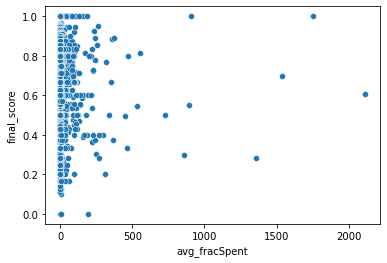

In [ ]:
#visualization for relation between fracSpent and final_score
sns.scatterplot(df_avgPer['avg_fracSpent'],df_avgPer['final_score'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_fracPause', ylabel='final_score'>

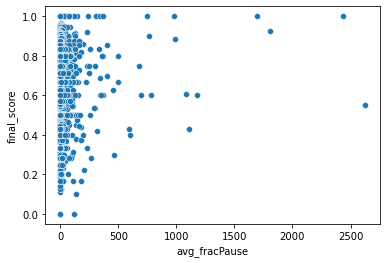

In [ ]:
#visualization of relation between fracPaused and final_score
sns.scatterplot(df_avgPer['avg_fracPause'],df_avgPer['final_score'])

### As we can see in above graphs, some outliers are available in the dataset which might be affecting the score of the models. 